<a href="https://colab.research.google.com/github/annarolandelli/Stat-Notebooks/blob/main/Anna_Rolandelli_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STA 2023 Final Project

Directions:
1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times.

4) Report best, worst, and average of the three runs.

Use any and all resources available to you.
Comment and explain the code.

Answer the questions to the best of your abilities.
If you have any questions, txt 561-479-8123
Save this notebook to your GitHub and submit the link on Canvas

In [ ]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [ ]:
#importing algorithms needed to import and run functions

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
#bringing in powerpoint with photos on it

In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [ ]:
#bringing in label algorithm to detect what is in the photos

In [ ]:
url = "https://docs.google.com/presentation/d/1lyE52a0yLCu9iUiKeFmdKayGJhu2Z6fyToXEMKeigoY/edit#slide=id.p"

In [ ]:
#hahn sample photos

In [ ]:
url = "https://docs.google.com/presentation/d/1Y3UL3rUu9NC7-7n2YyTw3kidoxbtR7TW_H_WrzqO5ds/edit#slide=id.g1a19eac4251_0_340"

In [ ]:
#my photos

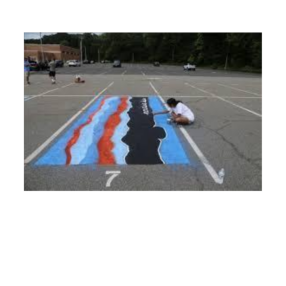

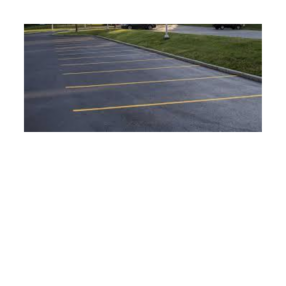

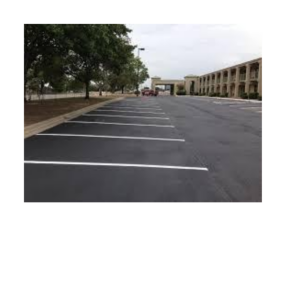

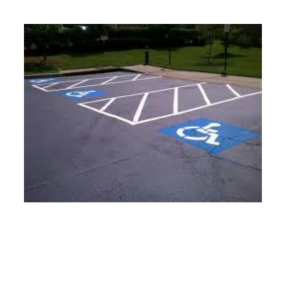

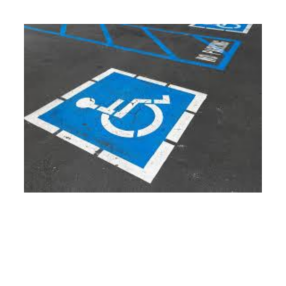

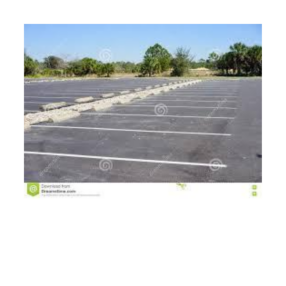

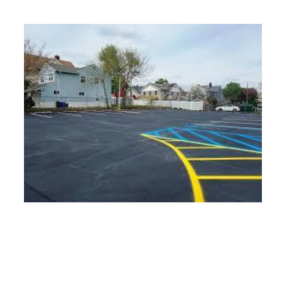

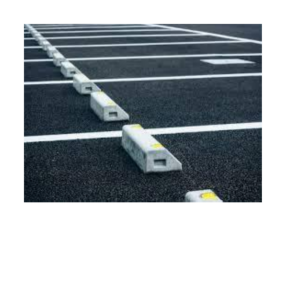

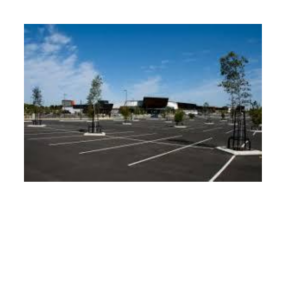

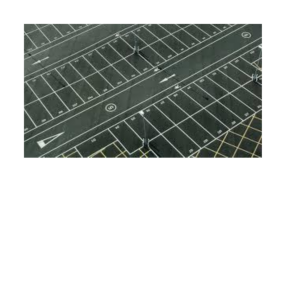

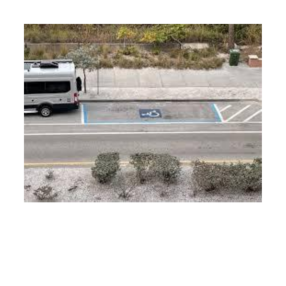

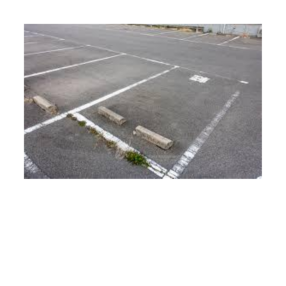

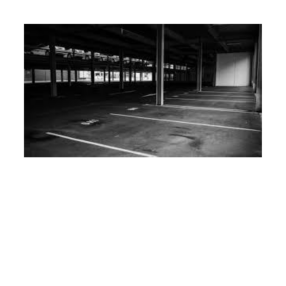

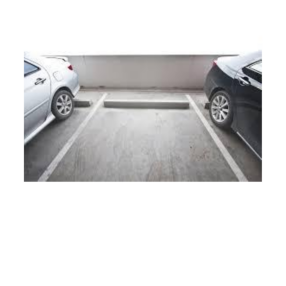

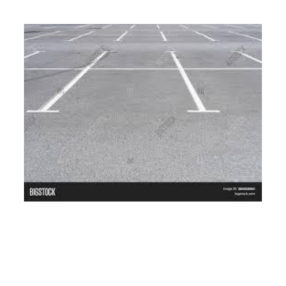

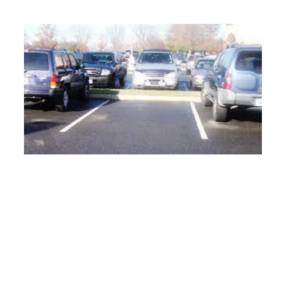

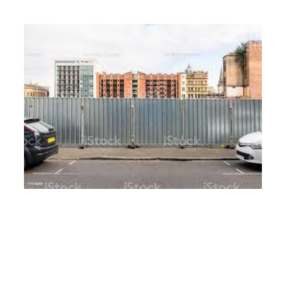

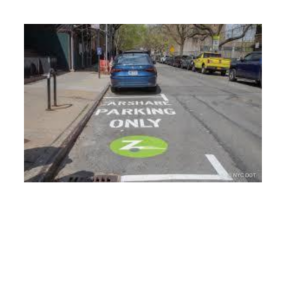

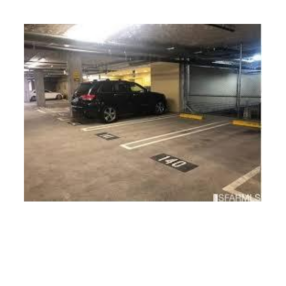

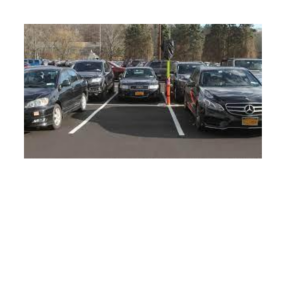

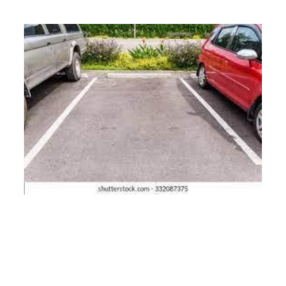

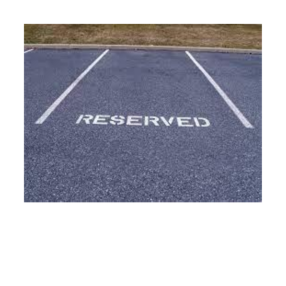

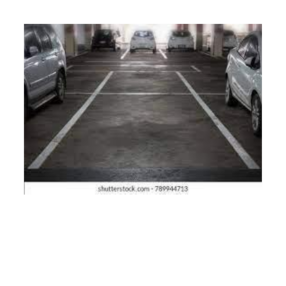

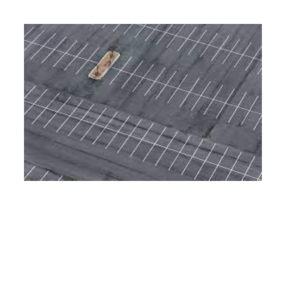

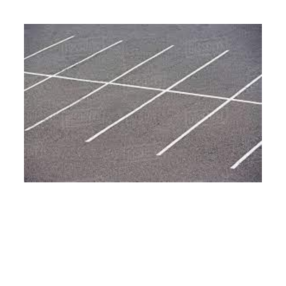

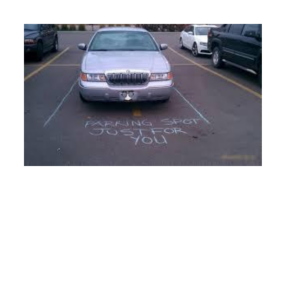

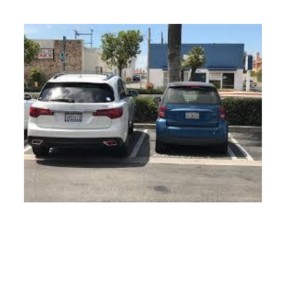

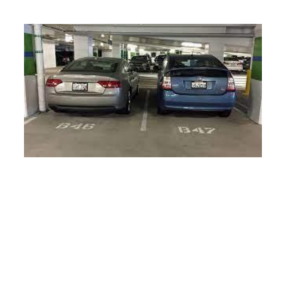

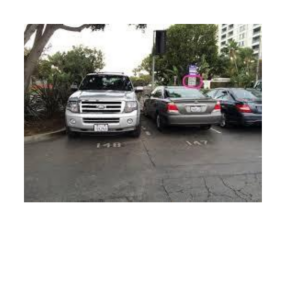

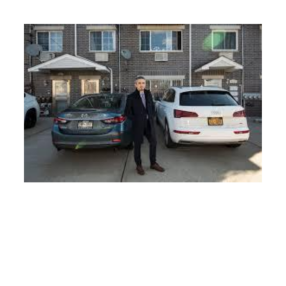

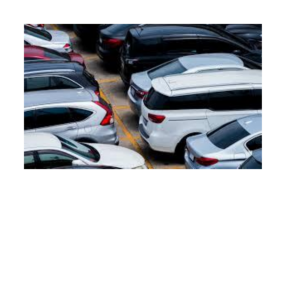

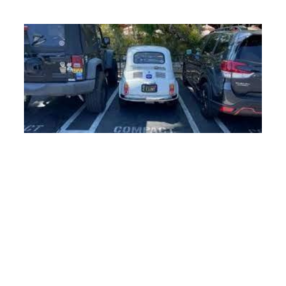

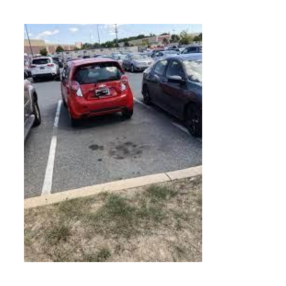

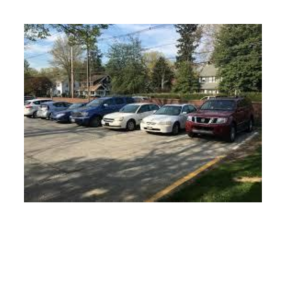

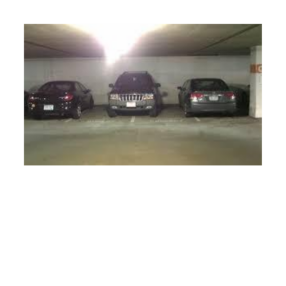

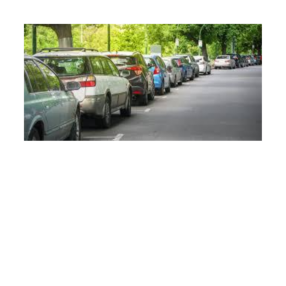

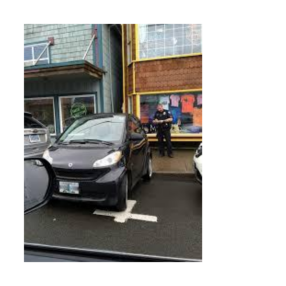

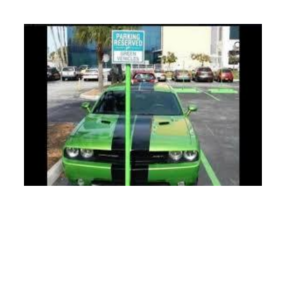

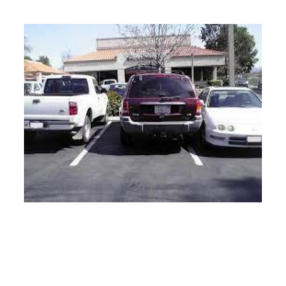

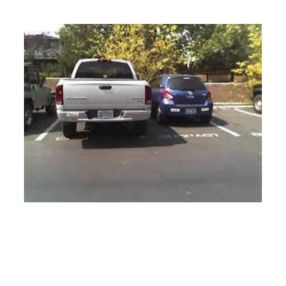

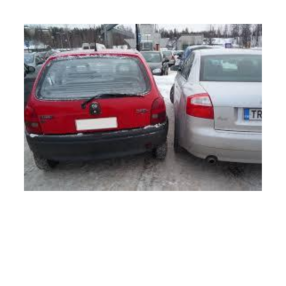

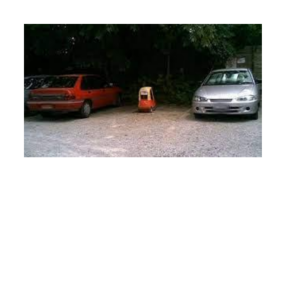

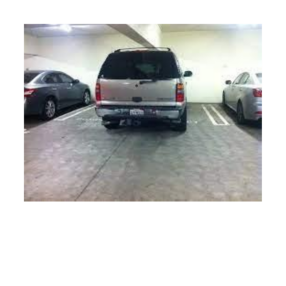

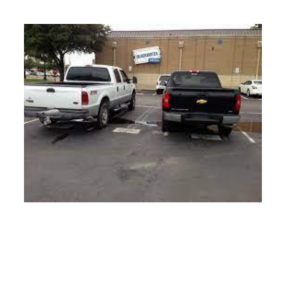

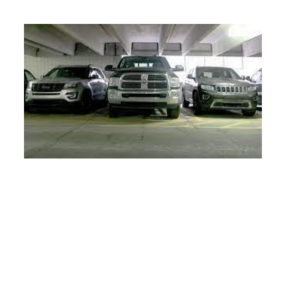

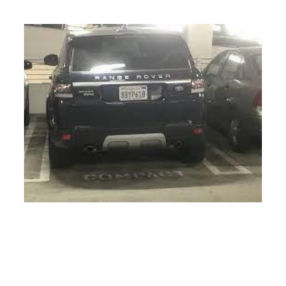

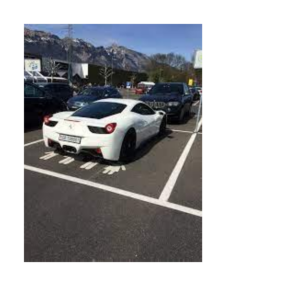

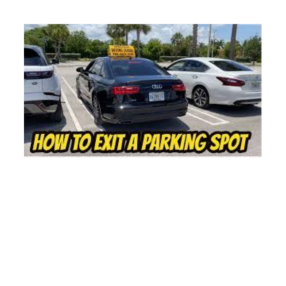

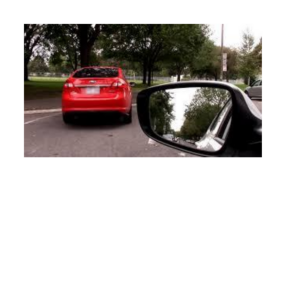

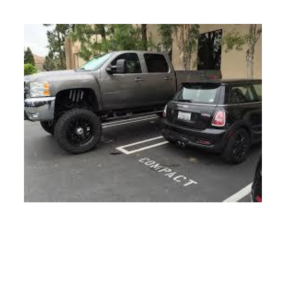

In [ ]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [ ]:
#50 images of empty and taken parking spaces

In [ ]:
images.shape

torch.Size([50, 3, 224, 224])

In [ ]:
#channels of imaged

In [ ]:
model(images)

tensor([[-0.8960, -3.1822, -2.2185,  ..., -6.6848, -1.5549,  0.5638],
        [ 0.2872, -3.0917, -2.8105,  ..., -4.3250,  0.2380,  1.5980],
        [ 0.5904, -4.5017, -2.7872,  ..., -6.2007,  0.4036,  0.6478],
        ...,
        [-1.7118, -4.3083, -2.9264,  ..., -5.8400, -1.5610,  1.4188],
        [-0.1915, -1.7343, -2.4420,  ..., -2.9780, -0.1073,  0.0987],
        [ 0.7610, -2.7088, -4.0538,  ..., -3.8193, -0.1553,  0.7506]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
#detecting dimensions of photos

In [ ]:
y = model(images)

In [ ]:
y.shape

torch.Size([50, 1000])

In [ ]:
#size of data graph

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [ ]:
for i in list(guesses):
    print(labels[i])

web site, website, internet site, site
solar dish, solar collector, solar furnace
patio, terrace
solar dish, solar collector, solar furnace
binder, ring-binder
seashore, coast, seacoast, sea-coast
web site, website, internet site, site
tennis ball
seashore, coast, seacoast, sea-coast
plate rack
web site, website, internet site, site
modem
monitor
cleaver, meat cleaver, chopper
letter opener, paper knife, paperknife
power drill
picket fence, paling
web site, website, internet site, site
television, television system
monitor
guillotine
envelope
turnstile
doormat, welcome mat
envelope
CD player
limousine, limo
dishwasher, dish washer, dishwashing machine
limousine, limo
minibus
carpenter's kit, tool kit
refrigerator, icebox
ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin
go-kart
hair slide
moving van
desk
web site, website, internet site, site
moving van
pickup, pickup truck
minivan
modem
power drill
garbage truck, dustcart
moving van
t

In [ ]:
#key words based on detections of images in photos, you can see it picked up to objects in and around the parking spots instead of stating if the parking spot is taken or empty

In [ ]:
Y = np.zeros(50,)
Y[25:] = 1

In [ ]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
#array of y values

In [ ]:
X = y.detach().cpu().numpy() 

In [ ]:
X.shape

(50, 1000)

In [ ]:
#shape of x values

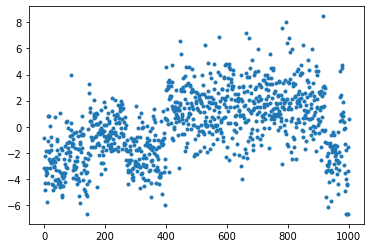

In [ ]:
plt.plot(X[0],'.')

In [ ]:
#x values represented on a graph

(array([ 16.,  60., 140., 191., 215., 202., 111.,  48.,  13.,   4.]),
 array([-6.690059 , -5.174332 , -3.658605 , -2.1428783, -0.6271512,
         0.8885758,  2.4043028,  3.9200299,  5.4357567,  6.9514837,
         8.467211 ], dtype=float32),
 <a list of 10 Patch objects>)

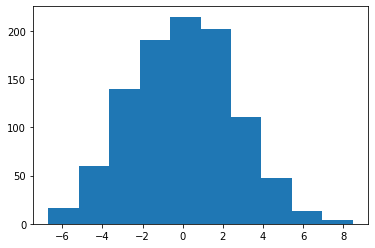

In [ ]:
plt.hist(X[0])

In [ ]:
#x values represented on a bar graph

In [ ]:
X[0]

array([-8.96039665e-01, -3.18219972e+00, -2.21850729e+00, -4.35173988e+00,
       -4.81987143e+00, -1.85673714e+00, -3.74070573e+00, -3.43615890e+00,
       -3.20229053e+00, -5.77650070e+00, -3.53474283e+00, -1.90392137e+00,
       -1.07901168e+00, -4.33392334e+00,  7.98306048e-01, -1.93873501e+00,
       -2.48583603e+00,  8.06051016e-01,  1.38355922e-02, -2.61259341e+00,
       -3.13654900e+00, -1.42058194e+00, -1.78613842e+00, -7.98392713e-01,
       -2.78888559e+00, -2.69413447e+00, -4.38211393e+00, -3.74516654e+00,
       -2.47829485e+00, -4.88406801e+00, -4.44143105e+00, -2.66596460e+00,
       -3.03082061e+00, -3.10019994e+00,  7.70930111e-01, -4.12474012e+00,
       -2.72157598e+00, -4.64755535e+00, -2.29346180e+00, -3.33703661e+00,
       -4.10687923e+00, -1.12565029e+00, -1.75459635e+00, -9.73993361e-01,
       -4.13911152e+00, -2.48136616e+00, -4.40190077e+00, -3.99277520e+00,
       -4.18859673e+00, -2.07816505e+00, -3.38271284e+00,  1.07368922e+00,
       -4.25881529e+00, -

In [ ]:
#all of the different values of the photos represented on the graph

In [ ]:
np.argmax(X[0])

916

In [ ]:
labels[948]

'Granny Smith'

In [8]:
top_ten = np.argsort(X[0]) [::-1][0:10]

NameError: ignored

In [ ]:
#asking the algorithm to detect the top ten categories of the things found in the photos

In [ ]:
for i in top_ten:
  print(labels[i])

web site, website, internet site, site
ski
screen, CRT screen
monitor
go-kart
snowmobile
mountain tent
binder, ring-binder
sleeping bag
television, television system


In [ ]:
#again you can see that it detected the objects in the photos rather than the parking spots

In [ ]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

In [ ]:
#all the different possible categories it has been trained to detect

(array([ 16.,  60., 140., 191., 215., 202., 111.,  48.,  13.,   4.]),
 array([-6.690059 , -5.174332 , -3.658605 , -2.1428783, -0.6271512,
         0.8885758,  2.4043028,  3.9200299,  5.4357567,  6.9514837,
         8.467211 ], dtype=float32),
 <a list of 10 Patch objects>)

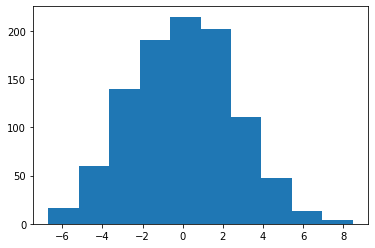

In [ ]:
plt.hist(X[0])

In [ ]:
#the top 10 categories represented on a bar graph

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

torch.Size([50, 1000])

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<ipython-input-92-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


In [ ]:
#using a third party website to run the photos against the key words assigned to detect how accurate it is

https://tensorspace.org/

In [10]:
#click weights and biases link to view runs

In [ ]:
#RESULTS FROM RUN

In [ ]:
#AVERAGE- feasible wildflower- end accuracy 0.9063

In [9]:
#BEST- solar grass- end accuracy 0.9375

In [ ]:
#AVERAGE- cosmic glade- end accuracy 0.9063

In [ ]:
#WORST- stellar surf- 0.2813 end accuracy